In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('housing.csv')
data.dropna(inplace=True)

In [3]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [5]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

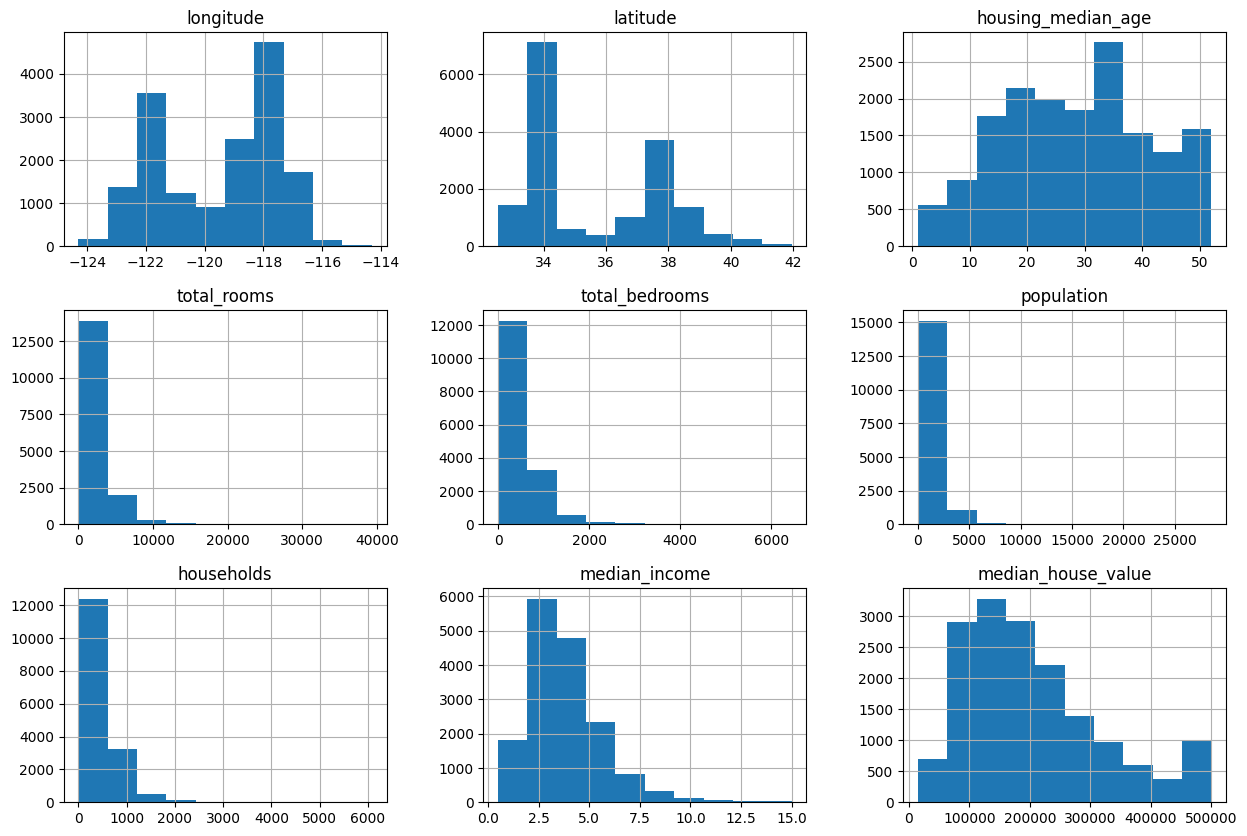

In [6]:
train_data.hist(figsize=(15,10))

In [7]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923897,-0.104467,0.042265,0.066054,0.098039,0.053548,-0.011300,-0.036452
latitude,-0.923897,1.000000,0.005825,-0.035267,-0.065515,-0.110153,-0.071142,-0.084750,-0.153869
housing_median_age,-0.104467,0.005825,1.000000,-0.356325,-0.314891,-0.293041,-0.295844,-0.113774,0.110754
total_rooms,0.042265,-0.035267,-0.356325,1.000000,0.928571,0.863490,0.917139,0.197544,0.133435
total_bedrooms,0.066054,-0.065515,-0.314891,0.928571,1.000000,0.885440,0.980400,-0.010255,0.048729
population,0.098039,-0.110153,-0.293041,0.863490,0.885440,1.000000,0.913363,0.003310,-0.026376
households,0.053548,-0.071142,-0.295844,0.917139,0.980400,0.913363,1.000000,0.010069,0.063483
median_income,-0.011300,-0.084750,-0.113774,0.197544,-0.010255,0.003310,0.010069,1.000000,0.688394
median_house_value,-0.036452,-0.153869,0.110754,0.133435,0.048729,-0.026376,0.063483,0.688394,1.000000


<Axes: >

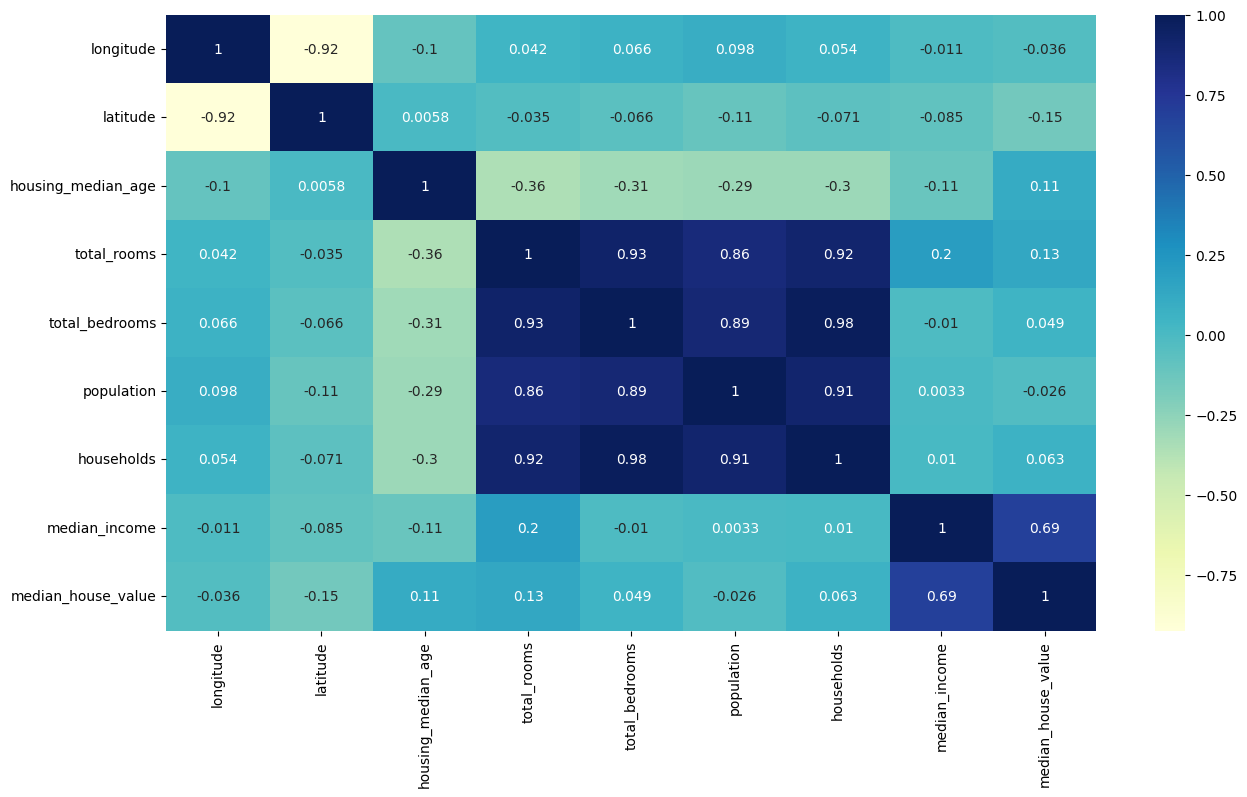

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [9]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

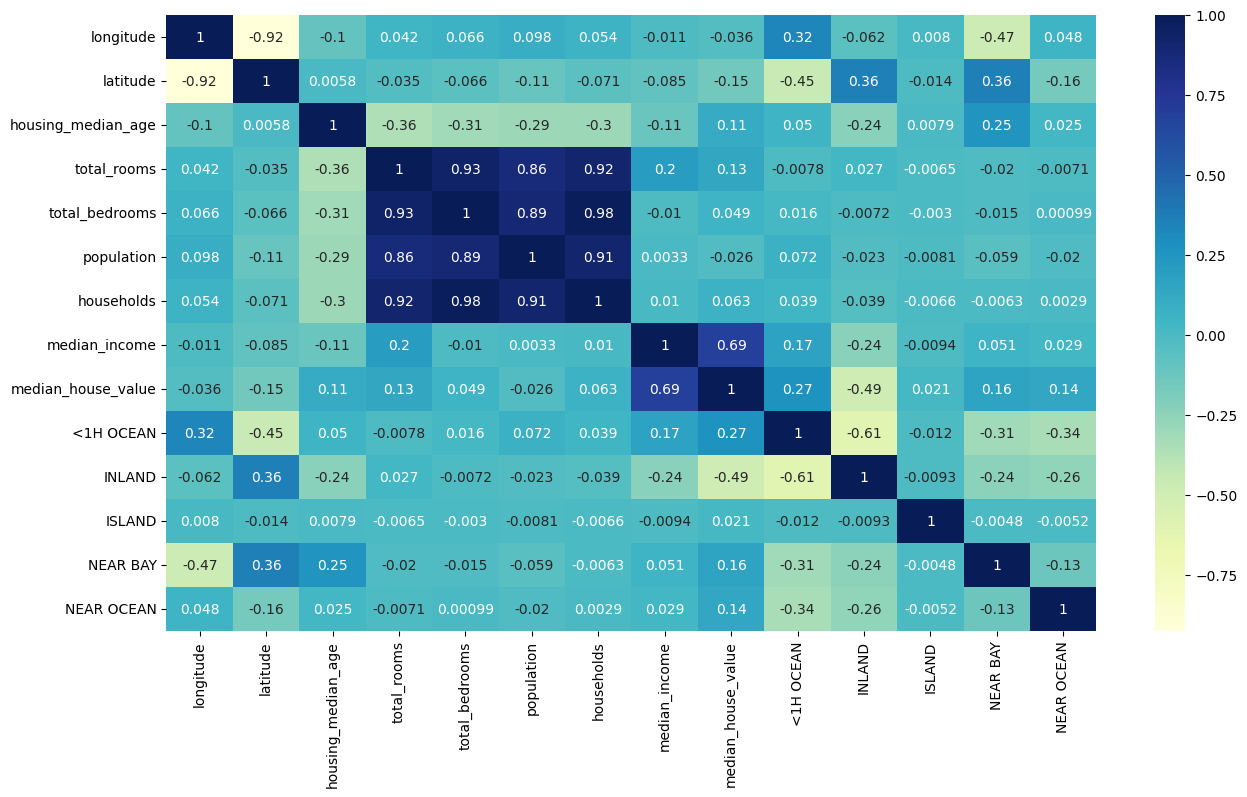

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

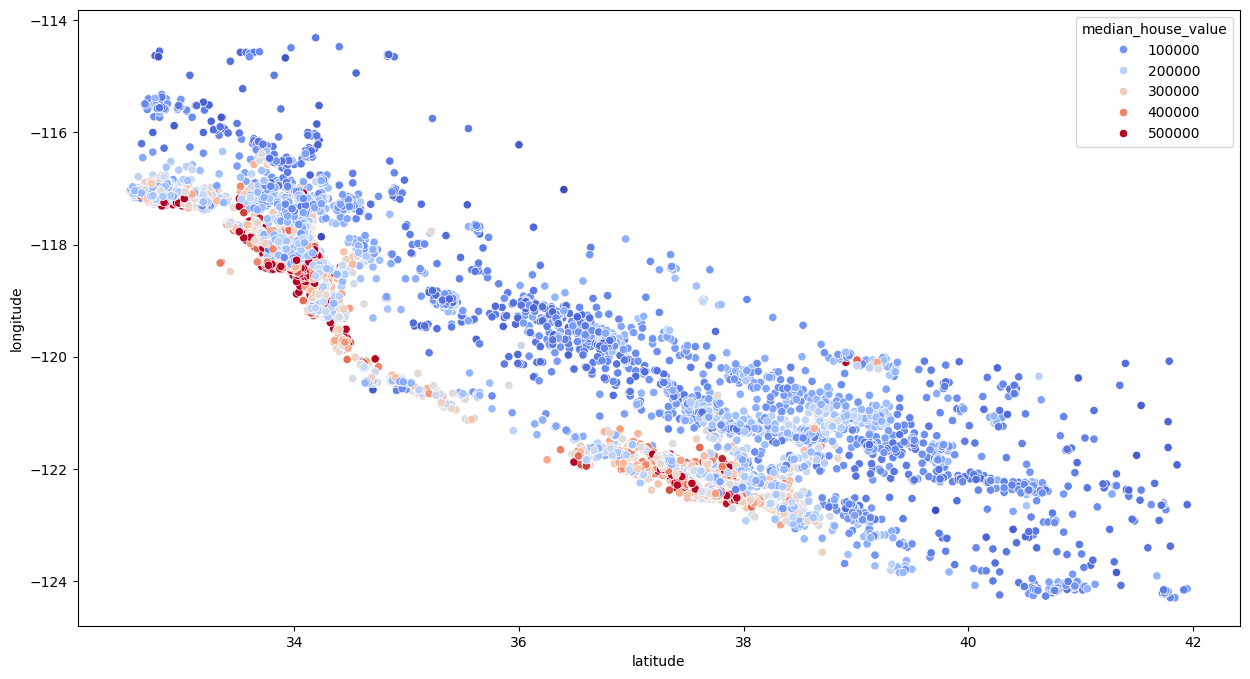

In [11]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [12]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

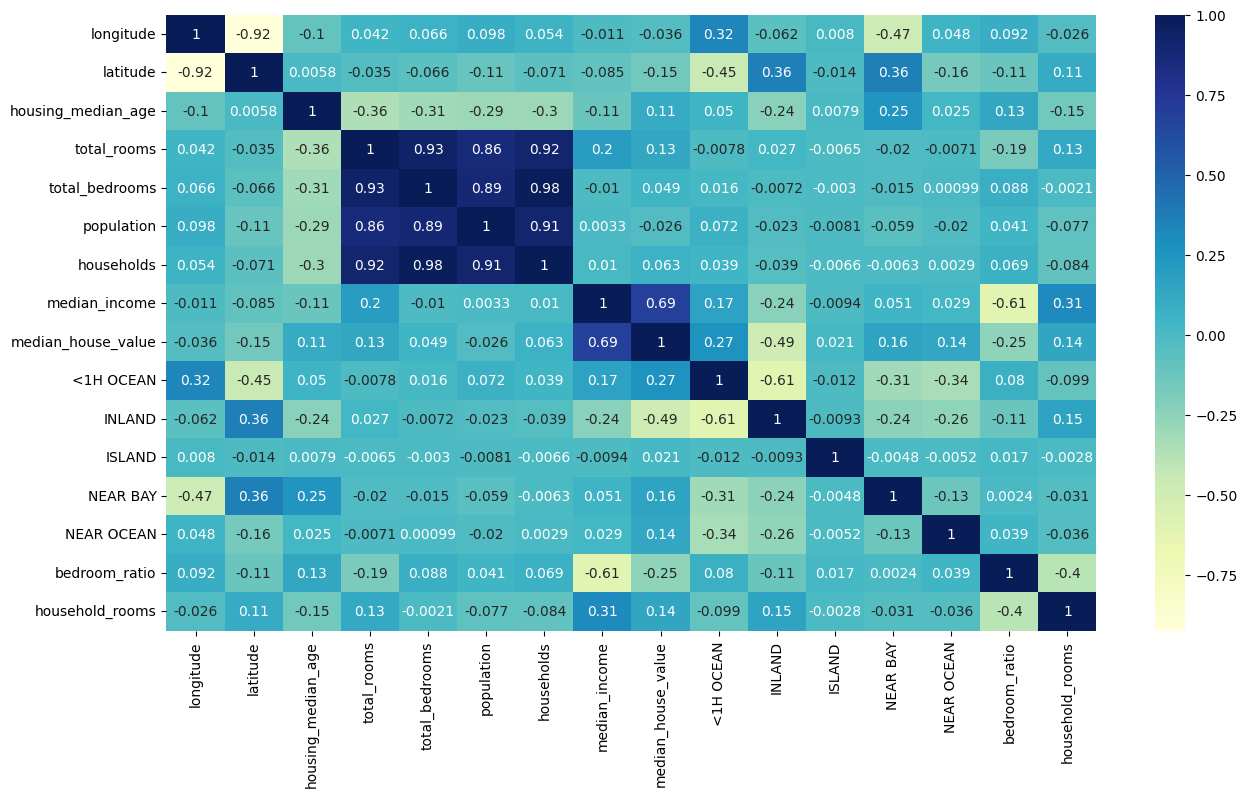

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg.fit(x_train, y_train)

LinearRegression()

In [15]:
test_data = x_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [18]:
reg.score(x_test, y_test)

0.6356947431238049

In [19]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
forest.score(x_test, y_test)

0.8145069520669217

In [21]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators': [100,200,300],
    'min_samples_split': [2,4],
    'max_depth': [None,4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                                            scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_.score(x_test, y_test)